# Market Price Prediction

Objective:
The primary objective of this project is to develop a robust time series machine learning model capable of 
accurately forecasting market trends based on historical data. By leveraging advanced algorithms, we aim 
to predict the quantity and prices of commodities for future months, empowering stakeholders to make 
proactive decisions regarding production, procurement, pricing strategies, and resource allocation

# Data Description:
The dataset comprises the following columns:

 market: The market or commodity under consideration.

 month: The month for which the data is recorded.

 year: The year corresponding to the recorded data.

 quantity: The quantity of the commodity traded or available.

 priceMin: The minimum price of the commodity during the month.

 priceMax: The maximum price of the commodity during the month.

 priceMod: The mode or most frequently occurring price of the commodity during the month.

 state: The state or region where the market is located.

 city: The city where the market is situated.

 date: The specific date of the recorded data.

In [1]:
### Importing the Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load the dataset

dataset = pd.read_csv("C:\\Users\\Hi\\ML_PROJECTS_17_MAR_2024\\TSF\\MarketPricePrediction.csv")

In [3]:
dataset.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [4]:
dataset.shape

(10227, 10)

In [5]:
dataset.duplicated().sum()

0

In [6]:
## checking for null values
dataset.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [8]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [9]:
dataset['Time_Stamp'] = pd.DataFrame(dataset, columns=['date'])
dataset.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,Time_Stamp
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01,2012-01-01


In [10]:
dataset.set_index('Time_Stamp', inplace=True)
dataset

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
Time_Stamp,,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01
...,...,...,...,...,...,...,...,...,...,...
2011-12-01,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,2011-12-01
2012-12-01,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,2012-12-01
2013-12-01,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,2013-12-01


In [11]:
dataset.sort_index(inplace=True)
dataset.head(10)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
Time_Stamp,,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01
1996-06-01,LASALGAON(MS),June,1996,175308,229,413,367,MS,LASALGAON,1996-06-01
1996-07-01,LASALGAON(MS),July,1996,156282,229,406,368,MS,LASALGAON,1996-07-01
1996-08-01,LASALGAON(MS),August,1996,173892,164,388,340,MS,LASALGAON,1996-08-01
1996-09-01,LASALGAON(MS),September,1996,138648,145,363,317,MS,LASALGAON,1996-09-01


In [12]:
dataset.nunique()

market       120
month         12
year          21
quantity    8641
priceMin    2026
priceMax    2732
priceMod    2424
state         21
city         117
date         242
dtype: int64

In [13]:
dataset['city'].value_counts()

LASALGAON        242
PIMPALGAON       224
MANMAD           218
LONAND           211
MAHUVA           210
                ... 
SRIGANGANAGAR      1
MEERUT             1
CHALLAKERE         1
RAJAHMUNDRY        1
NEEMUCH            1
Name: city, Length: 117, dtype: int64

In [14]:
city_name = 'LASALGAON'

In [15]:
df = dataset[dataset['city']==city_name]

In [16]:
df.shape

(242, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 1996-01-01 to 2016-02-01
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   market    242 non-null    object        
 1   month     242 non-null    object        
 2   year      242 non-null    int64         
 3   quantity  242 non-null    int64         
 4   priceMin  242 non-null    int64         
 5   priceMax  242 non-null    int64         
 6   priceMod  242 non-null    int64         
 7   state     242 non-null    object        
 8   city      242 non-null    object        
 9   date      242 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 20.8+ KB


## Durbin Watson Test

#check autocorrelation

In [18]:
import statsmodels.api as sm
sm.stats.durbin_watson(df['priceMin'])

0.11198258565276568

In [19]:

sm.stats.durbin_watson(df['priceMax'])

0.10085195772453

In [20]:

sm.stats.durbin_watson(df['priceMod'])

0.10688733595867562

In [21]:

sm.stats.durbin_watson(df['quantity'])

0.11231083210521553

<Figure size 2000x1400 with 0 Axes>

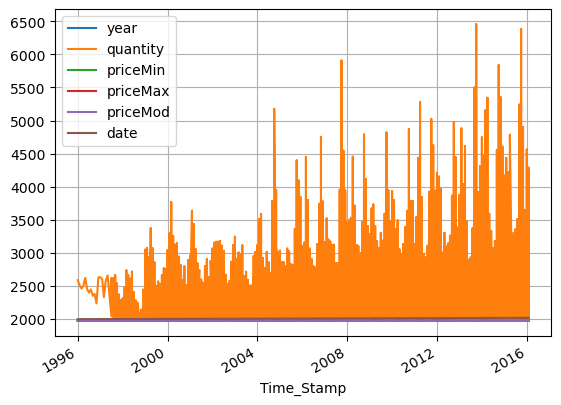

In [22]:
plt.figure(figsize=(20,14))
dataset.plot()
plt.grid()

<Figure size 2000x1400 with 0 Axes>

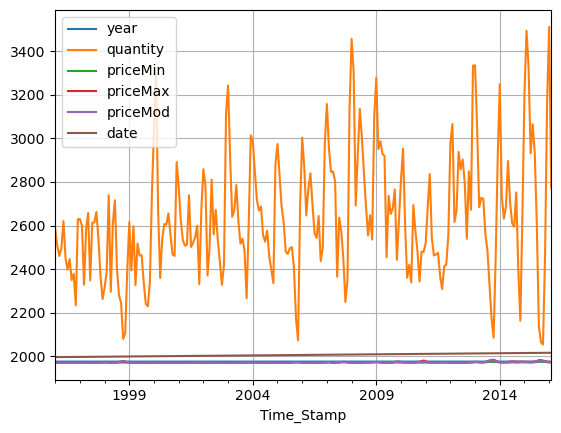

In [24]:
plt.figure(figsize=(20,14))
df.plot()
plt.grid()

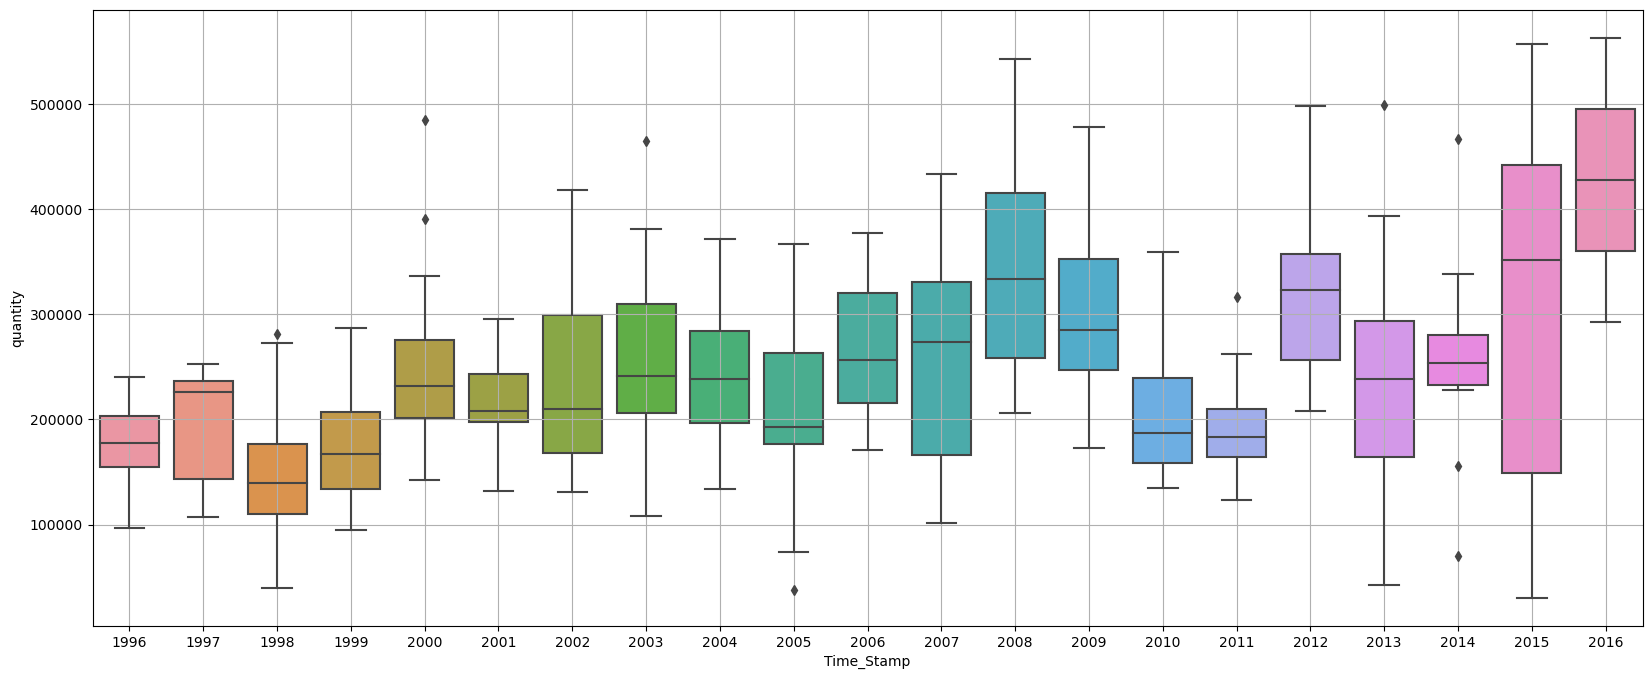

In [25]:
plt.figure(figsize=(20,8))
sns.boxplot(x = df.index.year, y = df['quantity'])
plt.grid()

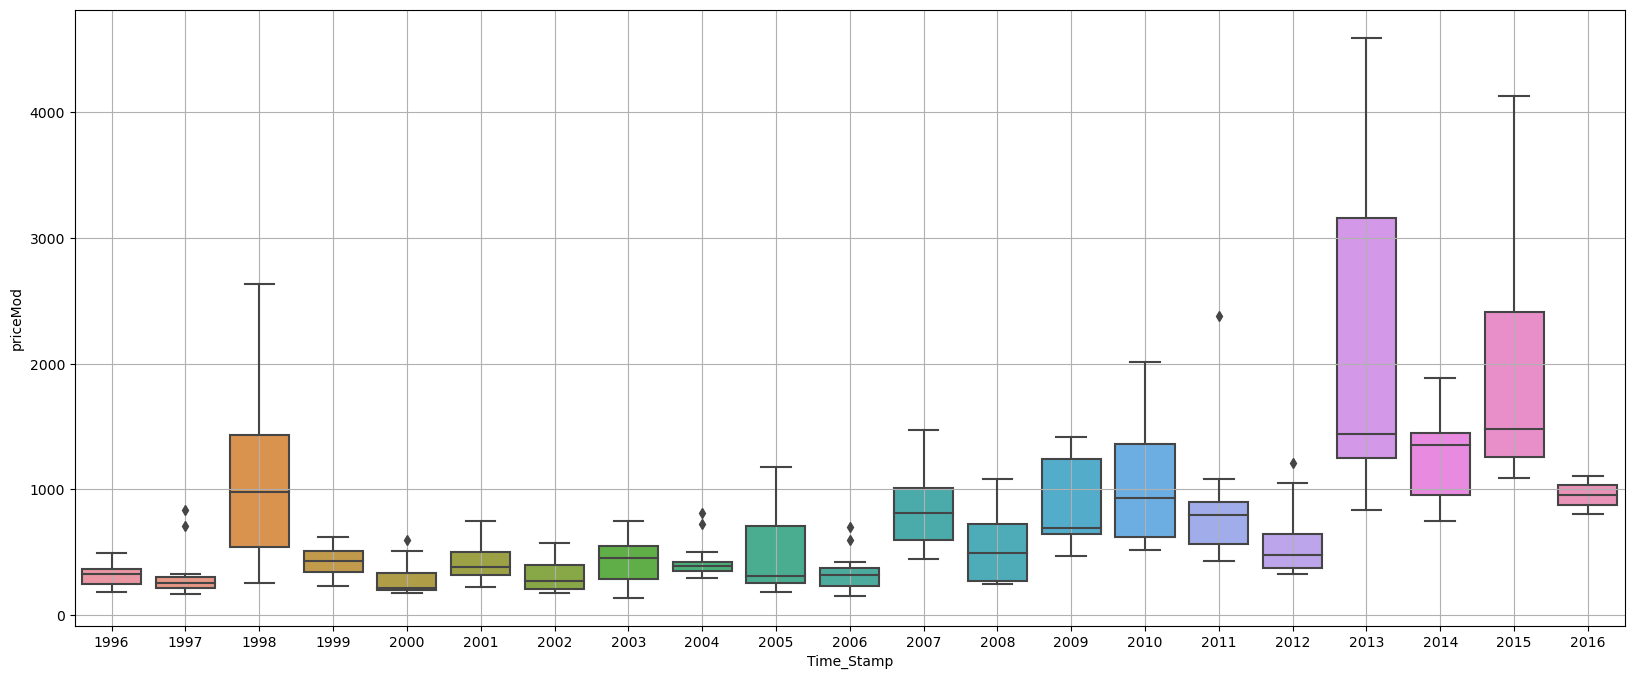

In [26]:
plt.figure(figsize=(20,8))
sns.boxplot(x = df.index.year, y = df['priceMod'])
plt.grid()

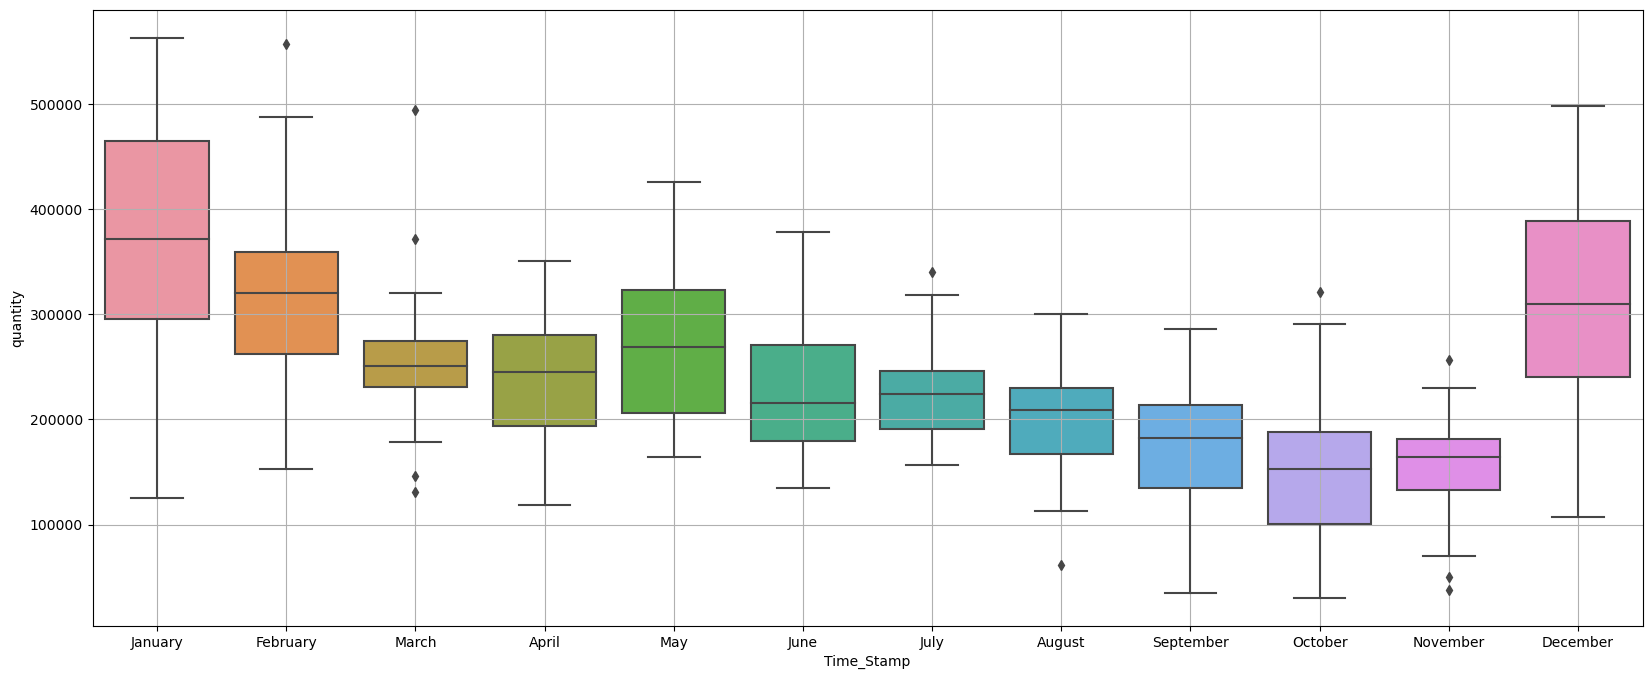

In [27]:
plt.figure(figsize=(20,8))
sns.boxplot(x = df.index.month_name(), y = df['quantity'])
plt.grid()

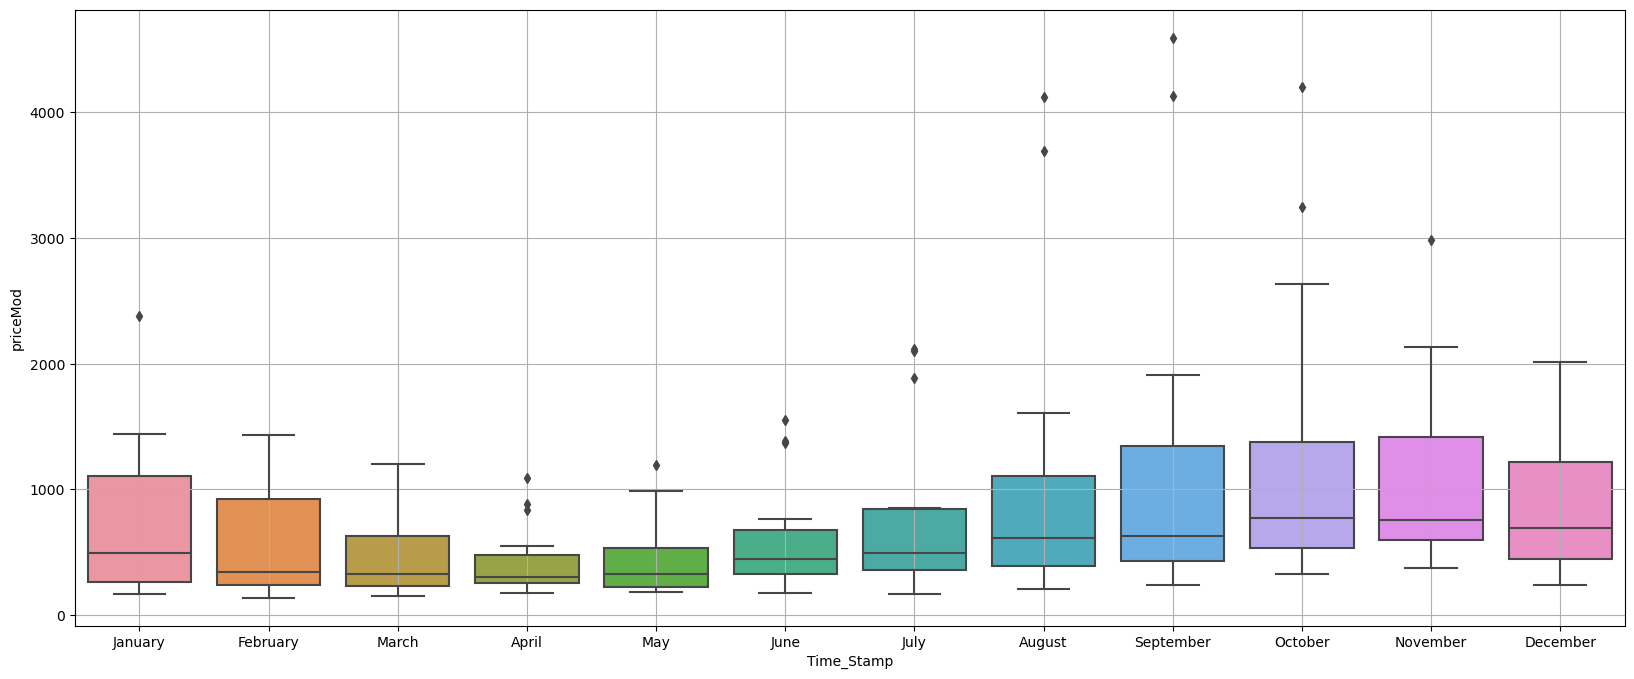

In [28]:
plt.figure(figsize=(20,8))
sns.boxplot(x = df.index.month_name(), y = df['priceMod'])
plt.grid()

<Axes: xlabel='Time_Stamp'>

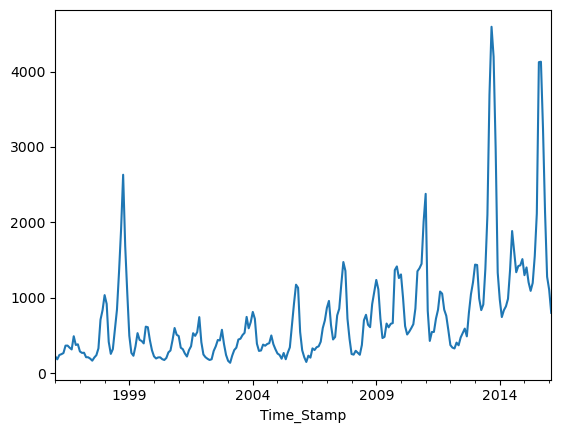

In [29]:
df['priceMod'].plot()

## Decomposition

<Figure size 2000x1200 with 0 Axes>

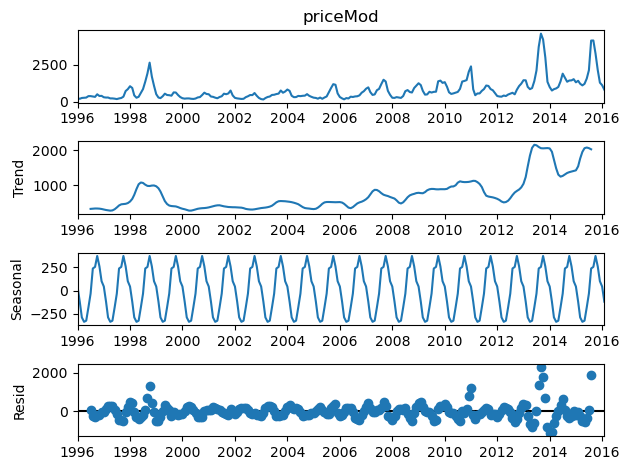

In [61]:
plt.figure(figsize=(20,12))
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['priceMod'])
decomposition.plot()
plt.show()

In [62]:
df.shape

(242, 10)

In [63]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
Time_Stamp,,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


In [64]:
start_date = df.index.min()
end_date = df.index.max()
print("Start Date  :", start_date)
print("End Date  :", end_date)

Start Date  : 1996-01-01 00:00:00
End Date  : 2016-02-01 00:00:00


In [65]:
train_df = df[pd.to_datetime(df['date']) < pd.to_datetime('2013-01-01')]
train_df.shape

(204, 10)

In [66]:
test_df = df[pd.to_datetime(df['date']) >= pd.to_datetime('2013-01-01')]
test_df.shape

(38, 10)

In [67]:
train = train_df[['priceMod']]
test = test_df[['priceMod']]

# Check for stationarity

In [68]:
# Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

# there are two methods avaiable - hypothesis testing, rolling stats
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    # plot rolling stats
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='rolling mean')
    std = plt.plot(rolstd, color='black', label='rolling std')
    plt.legend(loc='best')
    plt.title("Rolling Mean and Stadard Deviation - Stationary or Not!!")
    plt.show(block=False)

    # Perform Dickey Fuller Test
    print("Results of Dickey Fuller Test :")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['ADF Test stats', 'P-Value','#Lags', 'No. of Observation'])
    for key, value in dftest[4].items():
        dfoutput['Critical values (%s)'%key] = value
    print(dfoutput, '\n')

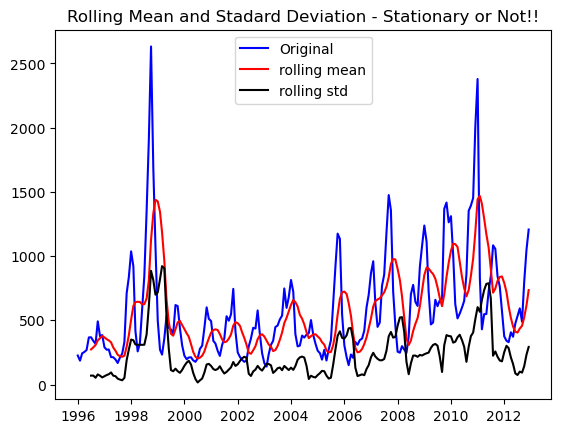

Results of Dickey Fuller Test :
ADF Test stats          -6.432561e+00
P-Value                  1.683288e-08
#Lags                    1.000000e+00
No. of Observation       2.020000e+02
Critical values (1%)    -3.463144e+00
Critical values (5%)    -2.875957e+00
Critical values (10%)   -2.574455e+00
dtype: float64 



In [69]:
test_stationarity(train['priceMod'])

In [70]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test - To check data is Stationary or Not")
    labels = ['ADF Test stats', 'P-Value','#Lags', 'No. of Observation']

    for i, j in zip(result, labels):
        print(j + " :-->" + str(i) )

    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak Evidence against null hypothesis and my times series is non-stationary")

In [71]:
check_adftest(train['priceMod'])

Augmented Dickey Fuller Test - To check data is Stationary or Not
ADF Test stats :-->-6.432560748698352
P-Value :-->1.6832881731082724e-08
#Lags :-->1
No. of Observation :-->202
Strong evidence against null hypothesis and my time series is Stationary


# Time Series Forcasting using ARIMA

In [72]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


## Parameter Selection

In [73]:
# creating an empty DataFrame with column names
dfobj = pd.DataFrame(columns=['Param', 'AIC'])
dfobj

,Param,AIC


In [74]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    mod = ARIMA(train['priceMod'], order=param)
    results_ARIMA = mod.fit()
    print("ARIMA{} - AIC :{}".format(param, results_ARIMA.aic))
    dfobj = dfobj.append({'param':param, 'AIC':results_ARIMA.aic}, ignore_index=True)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(0, 0, 0) - AIC :3030.668591341763
ARIMA(0, 0, 1) - AIC :2859.6104298811274
ARIMA(0, 1, 0) - AIC :2793.8834003383117
ARIMA(0, 1, 1) - AIC :2770.5744896799324
ARIMA(1, 0, 0) - AIC :2795.327391380534


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(1, 0, 1) - AIC :2761.435878737418
ARIMA(1, 1, 0) - AIC :2775.5390368344656
ARIMA(1, 1, 1) - AIC :2772.5742146886832


In [75]:
dfobj.sort_values(by=['AIC'])

,Param,AIC,param
5,NaN,2761.435879,"(1, 0, 1)"
3,NaN,2770.574490,"(0, 1, 1)"
7,NaN,2772.574215,"(1, 1, 1)"
6,NaN,2775.539037,"(1, 1, 0)"
2,NaN,2793.883400,"(0, 1, 0)"
4,NaN,2795.327391,"(1, 0, 0)"
1,NaN,2859.610430,"(0, 0, 1)"
0,NaN,3030.668591,"(0, 0, 0)"


In [76]:
# ARIMA ((1, 0, 1)) has the lowest AIC
model = ARIMA(train['priceMod'], order=(1,0,1),enforce_stationarity=False,enforce_invertibility=False)
results_ARIMA = model.fit()
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                  204
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1363.123
Date:                Fri, 24 May 2024   AIC                           2734.246
Time:                        10:33:02   BIC                           2747.479
Sample:                    01-01-1996   HQIC                          2739.600
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        570.5746    117.878      4.840      0.000     339.537     801.612
ar.L1          0.7276      0.044     16.490      0.000       0.641       0.814
ma.L1          0.4387      0.083      5.294      0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


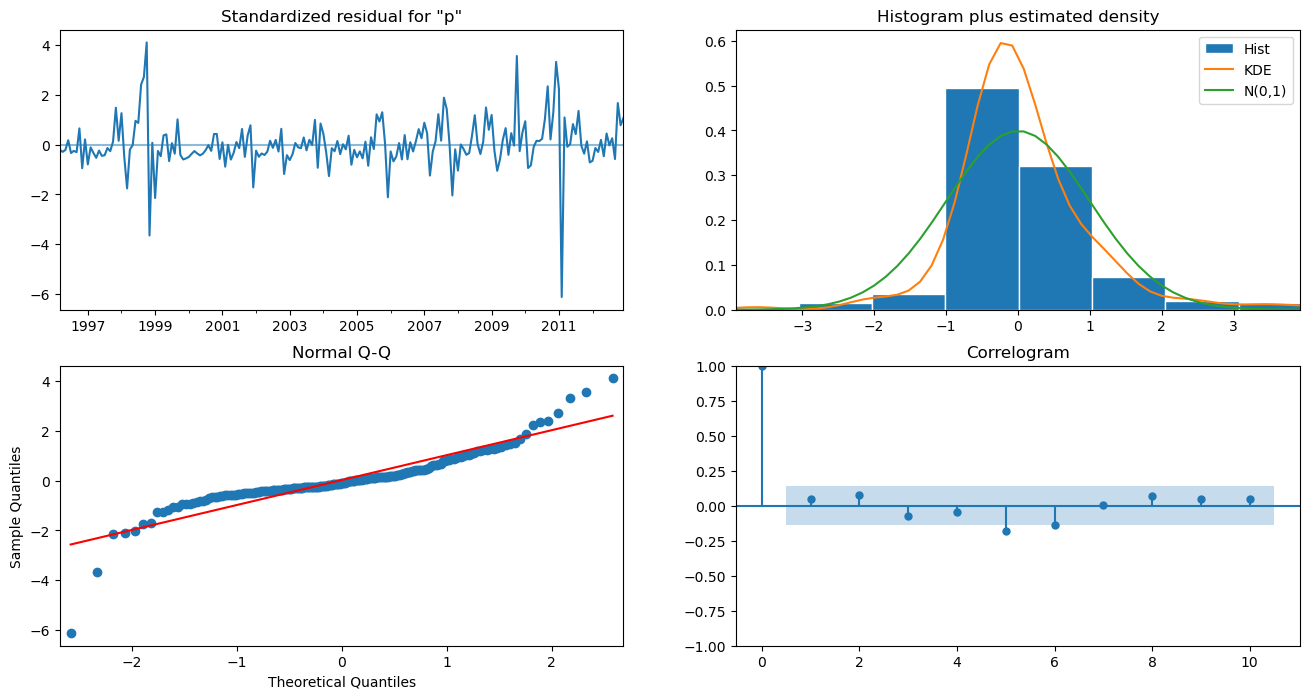

In [77]:
results_ARIMA.plot_diagnostics(figsize=(16,8))
plt.show()

In [78]:
final_hat_avg = test.copy()
pred_ARIMA = results_ARIMA.get_forecast(steps=len(test))
pred_ARIMA.predicted_mean

2013-01-01    1129.388622
2013-02-01     977.183680
2013-03-01     866.435006
2013-04-01     785.851101
2013-05-01     727.215945
2013-06-01     684.551327
2013-07-01     653.507330
2013-08-01     630.918828
2013-09-01     614.482788
2013-10-01     602.523455
2013-11-01     593.821502
2013-12-01     587.489711
2014-01-01     582.882519
2014-02-01     579.530195
2014-03-01     577.090947
2014-04-01     575.316081
2014-05-01     574.024638
2014-06-01     573.084946
2014-07-01     572.401200
2014-08-01     571.903687
2014-09-01     571.541682
2014-10-01     571.278277
2014-11-01     571.086615
2014-12-01     570.947157
2015-01-01     570.845684
2015-02-01     570.771848
2015-03-01     570.718124
2015-04-01     570.679032
2015-05-01     570.650588
2015-06-01     570.629891
2015-07-01     570.614832
2015-08-01     570.603874
2015-09-01     570.595901
2015-10-01     570.590099
2015-11-01     570.585878
2015-12-01     570.582806
2016-01-01     570.580571
2016-02-01     570.578945
Freq: MS, Na

In [79]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test.priceMod, pred_ARIMA.predicted_mean, squared=False))
print(rmse)

39.83234409226375


In [80]:
# calculate MAPE
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual))*100

In [81]:
mape1 = calculate_mape(test.priceMod, pred_ARIMA.predicted_mean)
print("MAPE :", mape1)

MAPE : 54.515935821459074


In [82]:
resultDF = pd.DataFrame({'Test RMSE' : rmse}, index=['ARIMA(1, 0, 1)'])
resultDF

,Test RMSE
"ARIMA(1, 0, 1)",39.832344


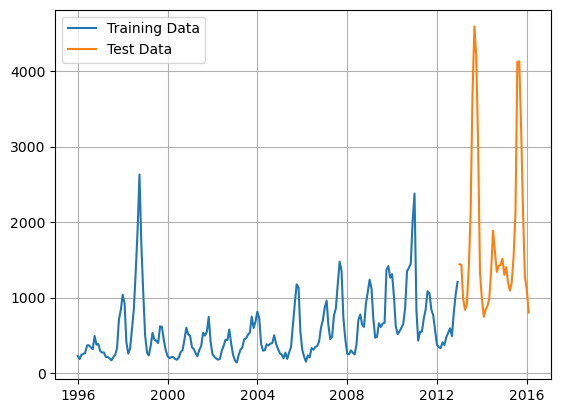

In [83]:
plt.plot(train, label="Training Data")
plt.plot(test, label="Test Data")
plt.legend(loc='best')
plt.grid()

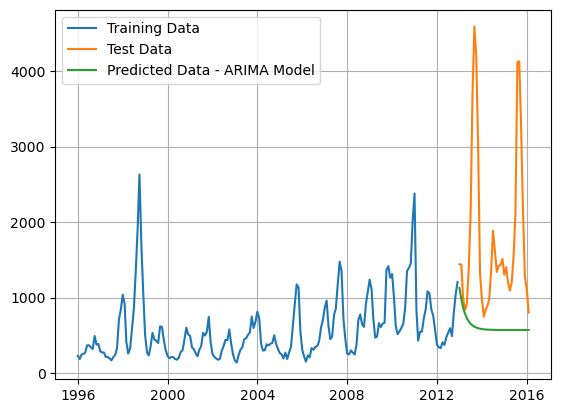

In [84]:
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, pred_ARIMA.predicted_mean, label='Predicted Data - ARIMA Model')
plt.legend(loc='best')
plt.grid()

### Build SARIMA Model

In [85]:
### creating an empty DataFrame with column names

dfobj2 = pd.DataFrame(columns = ['Param','seasonal','AIC'])
dfobj2

,Param,seasonal,AIC


In [86]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        model = sm.tsa.statespace.SARIMAX(train['priceMod'],order = param,seasonal_order = param_seasonal,
                                         enforce_stationarity = False,enforce_invertibility = False)
        results_SARIMA = model.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfobj2 = dfobj2.append({'Param' :param,'seasonal': param_seasonal,'AIC' : results_SARIMA.aic},ignore_index = True)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 0, 0)x(0, 0, 0, 12)7 - AIC:3237.772504536892
SARIMA(0, 0, 0)x(0, 0, 1, 12)7 - AIC:2981.3236679871216
SARIMA(0, 0, 0)x(0, 1, 0, 12)7 - AIC:2925.2212430044365
SARIMA(0, 0, 0)x(0, 1, 1, 12)7 - AIC:2656.4281643416653
SARIMA(0, 0, 0)x(1, 0, 0, 12)7 - AIC:2918.6343726652635
SARIMA(0, 0, 0)x(1, 0, 1, 12)7 - AIC:2821.0933509046677
SARIMA(0, 0, 0)x(1, 1, 0, 12)7 - AIC:2708.598462595296


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 0, 0)x(1, 1, 1, 12)7 - AIC:2657.036095925908
SARIMA(0, 0, 1)x(0, 0, 0, 12)7 - AIC:3007.7929776728724


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 0, 1, 12)7 - AIC:2788.5810025821756
SARIMA(0, 0, 1)x(0, 1, 0, 12)7 - AIC:2767.532834190145


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 1, 1, 12)7 - AIC:2496.3282001993557
SARIMA(0, 0, 1)x(1, 0, 0, 12)7 - AIC:2765.591547486485


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 0, 1, 12)7 - AIC:2659.677377358914
SARIMA(0, 0, 1)x(1, 1, 0, 12)7 - AIC:2563.8682581371972


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 1, 1, 12)7 - AIC:2496.673534145455
SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2781.099008199585
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:2628.192122338727
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:2749.0431682437193


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:2460.761863816172
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:2641.0088645755345
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:2621.3286762564367


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:2524.8352893523797
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:2458.126610888178


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2745.095401842219
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:2593.1269386018557
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:2719.8511285501136


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:2429.351270888742
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:2618.512701004037


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:2589.0622096906586
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:2510.517038501387


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:2427.5179327018413
SARIMA(1, 0, 0)x(0, 0, 0, 12)7 - AIC:2791.4178390743264
SARIMA(1, 0, 0)x(0, 0, 1, 12)7 - AIC:2638.4737068666723


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(1, 0, 0)x(0, 1, 0, 12)7 - AIC:2743.628355974489


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(0, 1, 1, 12)7 - AIC:2458.771188411355
SARIMA(1, 0, 0)x(1, 0, 0, 12)7 - AIC:2638.3748008710663


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 0, 1, 12)7 - AIC:2623.7160480558587
SARIMA(1, 0, 0)x(1, 1, 0, 12)7 - AIC:2507.09015511891


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 1, 1, 12)7 - AIC:2456.5413385844827
SARIMA(1, 0, 1)x(0, 0, 0, 12)7 - AIC:2751.9188549957535
SARIMA(1, 0, 1)x(0, 0, 1, 12)7 - AIC:2600.0895308386816


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(1, 0, 1)x(0, 1, 0, 12)7 - AIC:2702.7797628432027


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(0, 1, 1, 12)7 - AIC:2421.13443181994
SARIMA(1, 0, 1)x(1, 0, 0, 12)7 - AIC:2612.760219544881


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 0, 1, 12)7 - AIC:2586.040359081643
SARIMA(1, 0, 1)x(1, 1, 0, 12)7 - AIC:2481.2606564960465


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 1, 1, 12)7 - AIC:2420.2317846484793
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:2762.7540501578746
SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:2610.7931692408156
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:2738.003109648037


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:2451.4893464786264
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:2610.8071027344104


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:2608.19893922578
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:2503.2604295975216


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:2449.703056312649
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:2747.0950437798665
SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:2595.1268303848447


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:2721.714509604877


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:2436.1351354358567
SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:2607.839990138912


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:2591.0405167797903


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:2498.009182574775


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:2428.7647525359234


In [87]:
dfobj2.sort_values(by=['AIC'])

,Param,seasonal,AIC
47,"(1, 0, 1)","(1, 1, 1, 12)",2420.231785
43,"(1, 0, 1)","(0, 1, 1, 12)",2421.134432
31,"(0, 1, 1)","(1, 1, 1, 12)",2427.517933
63,"(1, 1, 1)","(1, 1, 1, 12)",2428.764753
27,"(0, 1, 1)","(0, 1, 1, 12)",2429.351271
...,...,...,...
4,"(0, 0, 0)","(1, 0, 0, 12)",2918.634373
2,"(0, 0, 0)","(0, 1, 0, 12)",2925.221243
1,"(0, 0, 0)","(0, 0, 1, 12)",2981.323668
8,"(0, 0, 1)","(0, 0, 0, 12)",3007.792978


In [88]:
# (1, 0, 1)	(1, 1, 1, 12)	4469.421735
model_sarima = sm.tsa.statespace.SARIMAX(train['priceMod'],order = (1,0,1), seasonal_order = (1,1,1,12),enforce_stationarity = False,enforce_invertibility = False)
results_SARIMA = model_sarima.fit()
print(results_SARIMA.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                           priceMod   No. Observations:                  204
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -1205.116
Date:                            Fri, 24 May 2024   AIC                           2420.232
Time:                                    10:33:14   BIC                           2436.141
Sample:                                01-01-1996   HQIC                          2426.683
                                     - 12-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7120      0.034     20.949      0.000       0.645       0.779
ma.L1          0.4298      0.079   

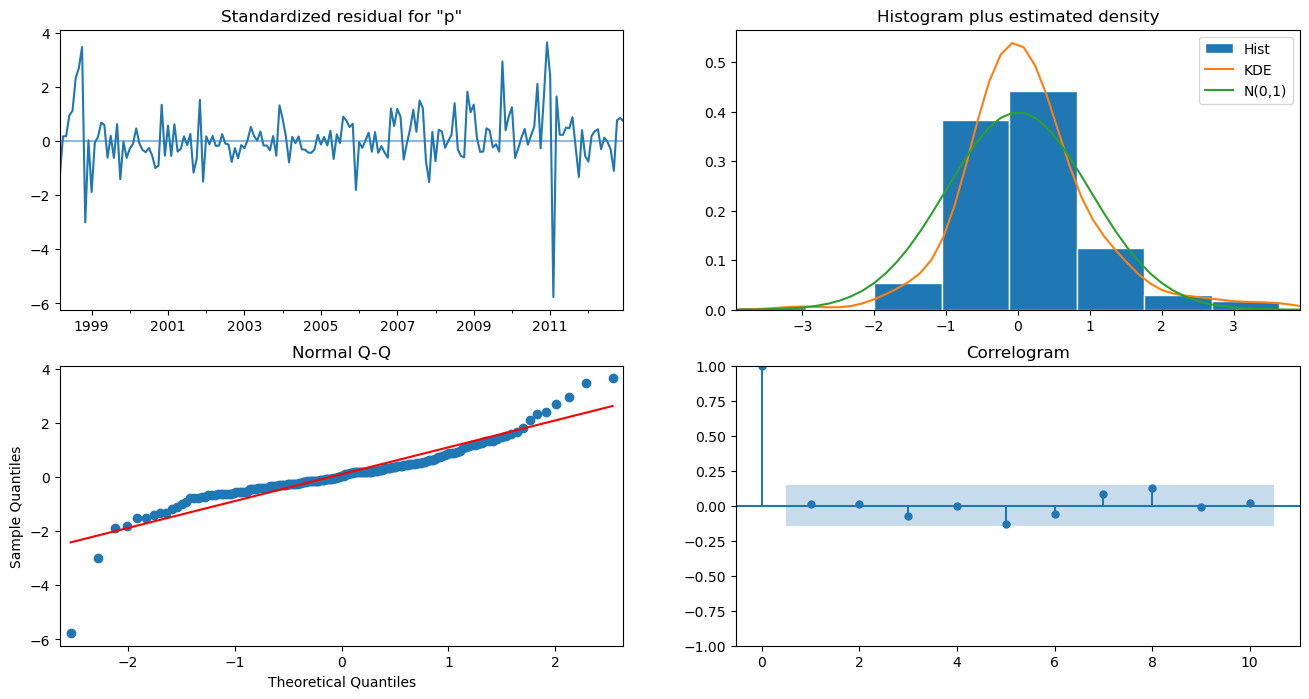

In [89]:
results_SARIMA.plot_diagnostics(figsize = (16,8))
plt.show()

In [90]:
final_hat_avg = test.copy()
pred_SARIMA = results_SARIMA.get_forecast(steps=len(test))
pred_SARIMA.predicted_mean

2013-01-01    1207.275618
2013-02-01     822.845641
2013-03-01     559.669153
2013-04-01     477.450913
2013-05-01     453.414098
2013-06-01     552.071849
2013-07-01     604.861772
2013-08-01     741.090665
2013-09-01     845.630527
2013-10-01     951.029040
2013-11-01     901.361179
2013-12-01     847.908904
2014-01-01     841.448436
2014-02-01     578.385009
2014-03-01     402.008097
2014-04-01     378.651987
2014-05-01     378.550029
2014-06-01     496.005956
2014-07-01     562.631172
2014-08-01     696.905794
2014-09-01     777.998058
2014-10-01     917.937021
2014-11-01     914.486604
2014-12-01     893.973670
2015-01-01     890.172710
2015-02-01     610.762166
2015-03-01     422.690221
2015-04-01     391.432201
2015-05-01     388.302925
2015-06-01     503.349440
2015-07-01     568.193952
2015-08-01     702.907492
2015-09-01     787.501163
2015-10-01     922.525511
2015-11-01     912.449378
2015-12-01     887.214233
2016-01-01     883.057373
2016-02-01     606.030681
Freq: MS, Na

In [91]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse1 = sqrt(mean_squared_error(test.priceMod, pred_SARIMA.predicted_mean, squared=False))
print(rmse1)

38.47589113408795


In [92]:
mape2 = calculate_mape(test.priceMod, pred_SARIMA.predicted_mean)
print("MAPE :", mape2)

MAPE : 53.12018236221093


In [93]:
resultDF1 = pd.DataFrame({'Test MAPE' : mape1}, index=['ARIMA(1, 0, 1)'])

resultDf2 = pd.DataFrame({'Test MAPE':mape2}, index=['SARIMA(1, 0, 1)(1, 1, 1, 12)'])
resultDf_final = pd.concat([resultDF1, resultDf2])
resultDf_final

,Test MAPE
"ARIMA(1, 0, 1)",54.515936
"SARIMA(1, 0, 1)(1, 1, 1, 12)",53.120182


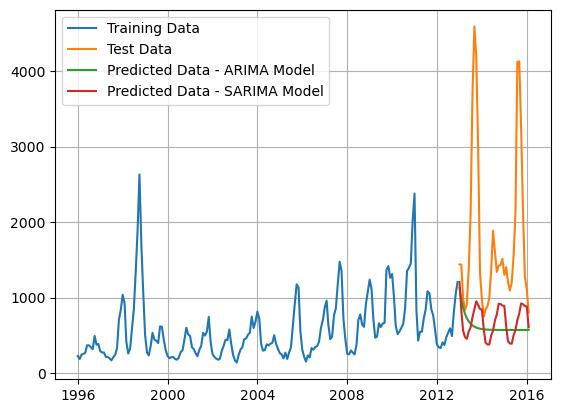

In [94]:
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, pred_ARIMA.predicted_mean, label='Predicted Data - ARIMA Model')
plt.plot(test.index, pred_SARIMA.predicted_mean, label='Predicted Data - SARIMA Model')
plt.legend(loc='best')
plt.grid()

## Build SARIMAX Model - include external factor

In [95]:
## Let's create exogeneious variable
## Open, High, Low, Close, Adj Close
ex_train = train_df[['quantity','priceMin','priceMax']]
ex_test = test_df[['quantity','priceMin','priceMax']]
ex_train.head()

,quantity,priceMin,priceMax
Time_Stamp,,,
1996-01-01,225063,160,257
1996-02-01,196164,133,229
1996-03-01,178992,155,274
1996-04-01,192592,136,279
1996-05-01,237574,154,312


In [96]:
dfobj3 = pd.DataFrame(columns=['Param', 'seasonal','AIC'])
dfobj3

,Param,seasonal,AIC


In [97]:
# Let's first use SARIMAX with exogenous variable (extrnal factor)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        model = sm.tsa.statespace.SARIMAX(train['priceMod'],exog=ex_train,
                                         order=param, seasonal_order=param_seasonal,
                                         enforce_stationarity=False,
                                          enforce_invertibility=False)
        results_SARIMAX = model.fit()
        print('SARIMAX{}{} - AIC:{}'.format(param, param_seasonal, results_SARIMAX.aic))
        dfobj3 = dfobj3.append({'param':param, 'seasonal':param_seasonal,
                               'AIC':results_SARIMAX.aic}, ignore_index=True)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 0)(0, 0, 0, 12) - AIC:3301.5416907606914
SARIMAX(0, 0, 0)(0, 0, 1, 12) - AIC:2265.437409347014


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 0)(0, 1, 0, 12) - AIC:3129.2178033479895
SARIMAX(0, 0, 0)(0, 1, 1, 12) - AIC:2140.720585723376


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 0)(1, 0, 0, 12) - AIC:2267.823981217739


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 0)(1, 0, 1, 12) - AIC:2268.166581336079
SARIMAX(0, 0, 0)(1, 1, 0, 12) - AIC:2180.654220182433


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 0)(1, 1, 1, 12) - AIC:2162.3496269611023
SARIMAX(0, 0, 1)(0, 0, 0, 12) - AIC:2330.5909828633244


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 1)(0, 0, 1, 12) - AIC:2177.8741889348985


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 1)(0, 1, 0, 12) - AIC:2244.2719007424585


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 1)(0, 1, 1, 12) - AIC:2071.5391365013948


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 1)(1, 0, 0, 12) - AIC:2199.8161726316293


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 1)(1, 0, 1, 12) - AIC:2179.6252081583316


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 1)(1, 1, 0, 12) - AIC:2121.6270726543707


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMAX(0, 0, 1)(1, 1, 1, 12) - AIC:2073.18927166711
SARIMAX(0, 1, 0)(0, 0, 0, 12) - AIC:3267.4859581056235
SARIMAX(0, 1, 0)(0, 0, 1, 12) - AIC:2249.590896799802


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMAX(0, 1, 0)(0, 1, 0, 12) - AIC:3133.861502628359
SARIMAX(0, 1, 0)(0, 1, 1, 12) - AIC:2132.8012496060314


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 0)(1, 0, 0, 12) - AIC:2260.308252996504


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 0)(1, 0, 1, 12) - AIC:2251.5148007718053


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 0)(1, 1, 0, 12) - AIC:2176.866966610907


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 0)(1, 1, 1, 12) - AIC:2134.8610395340265
SARIMAX(0, 1, 1)(0, 0, 0, 12) - AIC:2385.5273721996264


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 1)(0, 0, 1, 12) - AIC:2236.3281686246582
SARIMAX(0, 1, 1)(0, 1, 0, 12) - AIC:2310.5169981527315


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 1)(0, 1, 1, 12) - AIC:2127.8017273137657


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMAX(0, 1, 1)(1, 0, 0, 12) - AIC:2255.212678078138


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 1)(1, 0, 1, 12) - AIC:2233.8750186524903
SARIMAX(0, 1, 1)(1, 1, 0, 12) - AIC:2175.121684596078


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 1)(1, 1, 1, 12) - AIC:2123.421862127635
SARIMAX(1, 0, 0)(0, 0, 0, 12) - AIC:2364.455196522974


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.w

SARIMAX(1, 0, 0)(0, 0, 1, 12) - AIC:2209.7174609762797
SARIMAX(1, 0, 0)(0, 1, 0, 12) - AIC:2277.4093064531944


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 0)(0, 1, 1, 12) - AIC:2099.636474781689
SARIMAX(1, 0, 0)(1, 0, 0, 12) - AIC:2213.0091474429287


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 0)(1, 0, 1, 12) - AIC:2213.8305369088303


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 0)(1, 1, 0, 12) - AIC:2129.446910192506


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMAX(1, 0, 0)(1, 1, 1, 12) - AIC:2101.9416974893875
SARIMAX(1, 0, 1)(0, 0, 0, 12) - AIC:2330.0427955755185
SARIMAX(1, 0, 1)(0, 0, 1, 12) - AIC:2180.6858248268554


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 1)(0, 1, 0, 12) - AIC:2245.9322186920476


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 1)(0, 1, 1, 12) - AIC:2073.0184980699773
SARIMAX(1, 0, 1)(1, 0, 0, 12) - AIC:2193.12044445015


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.w

SARIMAX(1, 0, 1)(1, 0, 1, 12) - AIC:2184.318672232668
SARIMAX(1, 0, 1)(1, 1, 0, 12) - AIC:2112.753984367042


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 1)(1, 1, 1, 12) - AIC:2074.300359009592
SARIMAX(1, 1, 0)(0, 0, 0, 12) - AIC:2397.9306981827813


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 0)(0, 0, 1, 12) - AIC:2251.148336846278
SARIMAX(1, 1, 0)(0, 1, 0, 12) - AIC:2326.2583123660597


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 0)(0, 1, 1, 12) - AIC:2141.257859852937


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 0)(1, 0, 0, 12) - AIC:2250.7807206318935


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 0)(1, 0, 1, 12) - AIC:2252.251000993702


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 0)(1, 1, 0, 12) - AIC:2166.8280837870516


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 0)(1, 1, 1, 12) - AIC:2137.9314964035057


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 1)(0, 0, 0, 12) - AIC:2346.3717249451356


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 1)(0, 0, 1, 12) - AIC:2232.6736274532414
SARIMAX(1, 1, 1)(0, 1, 0, 12) - AIC:2301.8164677880663


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 1)(0, 1, 1, 12) - AIC:2099.140638779074


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 1)(1, 0, 0, 12) - AIC:2244.477547321192


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 1)(1, 0, 1, 12) - AIC:2235.312130394307


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 1)(1, 1, 0, 12) - AIC:2147.871326469499


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 1)(1, 1, 1, 12) - AIC:2101.0559595423274


In [98]:
dfobj3.sort_values(by=['AIC'])

,Param,seasonal,AIC,param
11,NaN,"(0, 1, 1, 12)",2071.539137,"(0, 0, 1)"
43,NaN,"(0, 1, 1, 12)",2073.018498,"(1, 0, 1)"
15,NaN,"(1, 1, 1, 12)",2073.189272,"(0, 0, 1)"
47,NaN,"(1, 1, 1, 12)",2074.300359,"(1, 0, 1)"
59,NaN,"(0, 1, 1, 12)",2099.140639,"(1, 1, 1)"
...,...,...,...,...
48,NaN,"(0, 0, 0, 12)",2397.930698,"(1, 1, 0)"
2,NaN,"(0, 1, 0, 12)",3129.217803,"(0, 0, 0)"
18,NaN,"(0, 1, 0, 12)",3133.861503,"(0, 1, 0)"
16,NaN,"(0, 0, 0, 12)",3267.485958,"(0, 1, 0)"


In [99]:
# SARIMAX : (0, 1, 1, 12)	2071.539137	(0, 0, 1)
model = sm.tsa.statespace.SARIMAX(train['priceMod'],exog=ex_train,
                                         order=(0,0,1),seasonal_order=(0,1,1,12),
                                         enforce_stationarity=False,
                                          enforce_invertibility=False)
results = model.fit()
print(results.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                           priceMod   No. Observations:                  204
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1029.770
Date:                            Fri, 24 May 2024   AIC                           2071.539
Time:                                    10:33:43   BIC                           2090.630
Sample:                                01-01-1996   HQIC                          2079.281
                                     - 12-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
quantity   -9.496e-05      0.000     -0.838      0.402      -0.000       0.000
priceMin       0.4735      0.065   

In [100]:
pred_SARIMAX = results.get_forecast(steps=len(test), exog=ex_test)
pred_SARIMAX.predicted_mean

2013-01-01    1556.791514
2013-02-01    1493.492610
2013-03-01    1046.139568
2013-04-01     912.109879
2013-05-01     980.933624
2013-06-01    1420.850877
2013-07-01    2091.752003
2013-08-01    3521.590720
2013-09-01    4331.257109
2013-10-01    4246.096636
2013-11-01    2972.554351
2013-12-01    1422.089060
2014-01-01    1176.556472
2014-02-01     756.721776
2014-03-01     847.076467
2014-04-01    1032.835103
2014-05-01    1090.463311
2014-06-01    1398.655174
2014-07-01    2016.059871
2014-08-01    1663.574199
2014-09-01    1479.806610
2014-10-01    1446.616895
2014-11-01    1304.825935
2014-12-01    1407.781448
2015-01-01    1360.031741
2015-02-01    1339.431609
2015-03-01    1217.219649
2015-04-01    1110.414661
2015-05-01    1379.306522
2015-06-01    1666.853421
2015-07-01    2196.410875
2015-08-01    4267.202014
2015-09-01    4260.048051
2015-10-01    3197.970778
2015-11-01    2574.913848
2015-12-01    1397.920192
2016-01-01    1247.340609
2016-02-01     936.730262
Freq: MS, Na

In [101]:
rmse = sqrt(mean_squared_error(test.priceMod, pred_SARIMAX.predicted_mean, squared=False))
print(rmse)

11.323585985723188


In [102]:
mape3 = calculate_mape(test.priceMod, pred_SARIMAX.predicted_mean)
print("MAPE :", mape3)

MAPE : 6.5994281927806275


In [103]:
resultDF1 = pd.DataFrame({'Test MAPE' : mape1}, index=['ARIMA(1, 0, 1)'])

resultDf2 = pd.DataFrame({'Test MAPE':mape2}, index=['SARIMA(1, 0, 1)(1, 1, 1, 12)'])
resultDf3 = pd.DataFrame({'Test MAPE':mape3}, index=['SARIMAX(0, 0, 1)(0, 1, 1, 12)'])
resultDf_final = pd.concat([resultDF1, resultDf2,resultDf3])
resultDf_final

,Test MAPE
"ARIMA(1, 0, 1)",54.515936
"SARIMA(1, 0, 1)(1, 1, 1, 12)",53.120182
"SARIMAX(0, 0, 1)(0, 1, 1, 12)",6.599428


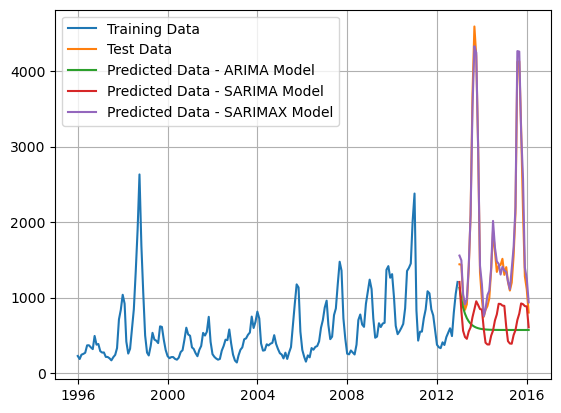

In [104]:
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, pred_ARIMA.predicted_mean, label='Predicted Data - ARIMA Model')
plt.plot(test.index, pred_SARIMA.predicted_mean, label='Predicted Data - SARIMA Model')
plt.plot(test.index, pred_SARIMAX.predicted_mean, label='Predicted Data - SARIMAX Model')
plt.legend(loc='best')
plt.grid()

## Facebook Prophet Time Series Forecasting Model

In [66]:
#!pip install prophet

In [72]:
import prophet

In [73]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [74]:
dataset.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
Time_Stamp,,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


In [75]:
dataset.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
Time_Stamp,,,,,,,,,,
2016-02-01,RAIPUR(CHGARH),February,2016,4300,950,1142,1077,HR,RAIPUR,2016-02-01
2016-02-01,INDORE(MP),February,2016,97178,104,856,575,MP,INDORE,2016-02-01
2016-02-01,YEOLA(MS),February,2016,272527,347,984,730,MS,YEOLA,2016-02-01
2016-02-01,SATANA(MS),February,2016,90142,281,1130,806,MS,SATANA,2016-02-01
2016-02-01,KOLKATA,February,2016,168020,1246,1368,1309,WB,KOLKATA,2016-02-01


In [76]:
df.shape

(242, 10)

In [77]:
df.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')

In [78]:
total = df.groupby(['date'])['priceMin', 'priceMax','priceMod','quantity'].sum().reset_index()

In [79]:
total.head()

,date,priceMin,priceMax,priceMod,quantity
0,1996-01-01,160,257,226,225063
1,1996-02-01,133,229,186,196164
2,1996-03-01,155,274,243,178992
3,1996-04-01,136,279,254,192592
4,1996-05-01,154,312,269,237574


In [80]:
#  Please ensure to change your "date" to "ds" and "target variable" to "y" whenever you build prophet model
df_prophet = total.rename(columns={'date':'ds', 'priceMod':'y'})

In [81]:
df_prophet

,ds,priceMin,priceMax,y,quantity
0,1996-01-01,160,257,226,225063
1,1996-02-01,133,229,186,196164
2,1996-03-01,155,274,243,178992
3,1996-04-01,136,279,254,192592
4,1996-05-01,154,312,269,237574
...,...,...,...,...,...
237,2015-10-01,1581,3614,3248,30532
238,2015-11-01,1565,2968,2134,178713
239,2015-12-01,923,1690,1280,438498
240,2016-01-01,677,1407,1108,563321


In [82]:
from prophet import Prophet

In [83]:
m = Prophet()
model = m.fit(df_prophet)

10:18:37 - cmdstanpy - INFO - Chain [1] start processing
10:18:38 - cmdstanpy - INFO - Chain [1] done processing


In [84]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [85]:
# Build TimeSeries Forecasting Model
future_global = model.make_future_dataframe(periods=100, freq='M')

In [86]:
future_global.tail(20)

,ds
322,2022-10-31
323,2022-11-30
324,2022-12-31
325,2023-01-31
326,2023-02-28
327,2023-03-31
328,2023-04-30
329,2023-05-31
330,2023-06-30
331,2023-07-31


In [87]:
len(future_global)

342

In [88]:
prediction = model.predict(future_global)

In [89]:
prediction.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-01-01,382.646504,-263.419282,972.092867,382.646504,382.646504,-19.813870,-19.813870,-19.813870,-19.813870,-19.813870,-19.813870,0.0,0.0,0.0,362.832635
1,1996-02-01,383.745808,-452.991362,844.583873,383.745808,383.745808,-180.714757,-180.714757,-180.714757,-180.714757,-180.714757,-180.714757,0.0,0.0,0.0,203.031051


In [90]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [91]:
prediction[['ds','yhat_lower','yhat_upper','yhat']].tail(20)

,ds,yhat_lower,yhat_upper,yhat
322,2022-10-31,2110.135735,3459.601762,2774.191957
323,2022-11-30,1951.293861,3295.065061,2624.920812
324,2022-12-31,1883.847872,3228.805721,2564.513080
325,2023-01-31,1721.606978,3092.258190,2415.540476
326,2023-02-28,1779.909133,3154.230588,2444.854236
327,2023-03-31,1707.230607,2963.051660,2338.187351
328,2023-04-30,1659.431513,2953.668640,2297.276467
329,2023-05-31,1718.152968,3040.787441,2416.749455
330,2023-06-30,1956.599514,3212.567694,2558.196340
331,2023-07-31,2274.171096,3647.498713,2958.424657


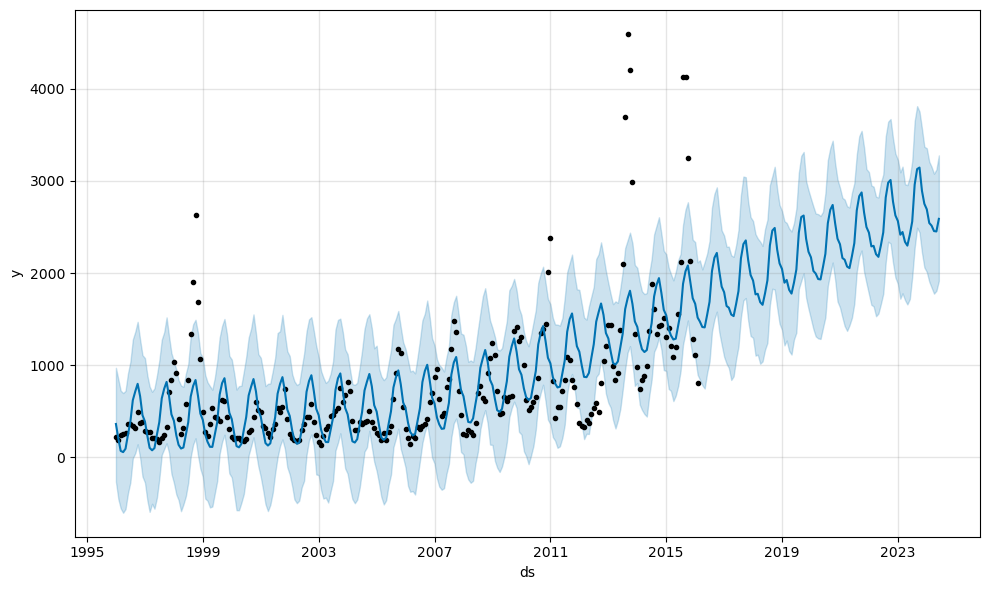

In [92]:
model.plot(prediction)
plt.show()

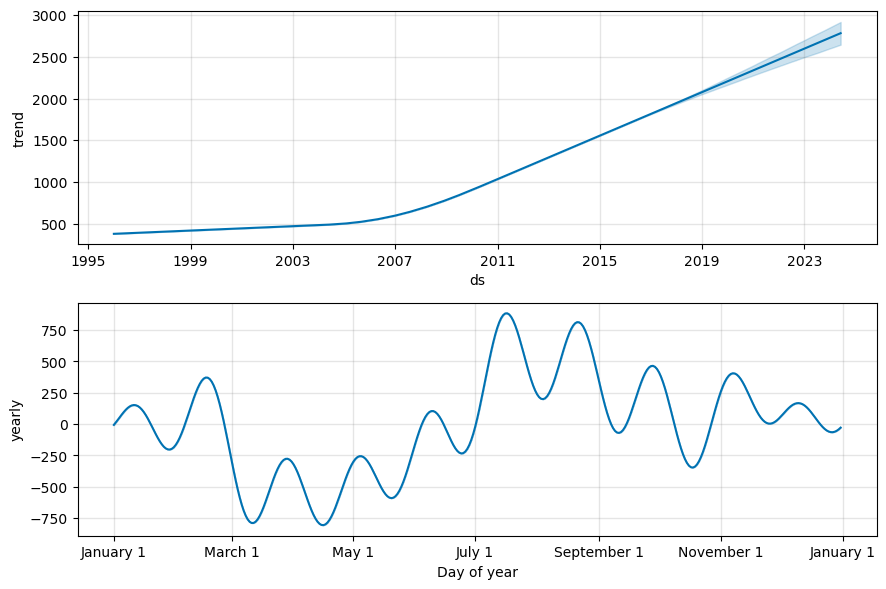

In [93]:
model.plot_components(prediction)
plt.show()

In [94]:
# Find the accuracy along with cross validation method
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon='30 days', period = '15 days', initial='30 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/468 [00:00<?, ?it/s]

10:18:43 - cmdstanpy - INFO - Chain [1] start processing
10:18:43 - cmdstanpy - INFO - Chain [1] done processing
10:18:43 - cmdstanpy - INFO - Chain [1] start processing
10:18:43 - cmdstanpy - INFO - Chain [1] done processing
10:18:44 - cmdstanpy - INFO - Chain [1] start processing
10:18:44 - cmdstanpy - INFO - Chain [1] done processing
10:18:44 - cmdstanpy - INFO - Chain [1] start processing
10:18:44 - cmdstanpy - INFO - Chain [1] done processing
10:18:44 - cmdstanpy - INFO - Chain [1] start processing
10:18:44 - cmdstanpy - INFO - Chain [1] done processing
10:18:44 - cmdstanpy - INFO - Chain [1] start processing
10:18:45 - cmdstanpy - INFO - Chain [1] done processing
10:18:45 - cmdstanpy - INFO - Chain [1] start processing
10:18:45 - cmdstanpy - INFO - Chain [1] done processing
10:18:45 - cmdstanpy - INFO - Chain [1] start processing
10:18:45 - cmdstanpy - INFO - Chain [1] done processing
10:18:46 - cmdstanpy - INFO - Chain [1] start processing
10:18:46 - cmdstanpy - INFO - Chain [1]

10:22:25 - cmdstanpy - INFO - Chain [1] done processing
10:22:25 - cmdstanpy - INFO - Chain [1] start processing
10:22:25 - cmdstanpy - INFO - Chain [1] done processing
10:22:25 - cmdstanpy - INFO - Chain [1] start processing
10:22:25 - cmdstanpy - INFO - Chain [1] done processing
10:22:26 - cmdstanpy - INFO - Chain [1] start processing
10:22:26 - cmdstanpy - INFO - Chain [1] done processing
10:22:26 - cmdstanpy - INFO - Chain [1] start processing
10:22:26 - cmdstanpy - INFO - Chain [1] done processing
10:22:26 - cmdstanpy - INFO - Chain [1] start processing
10:22:26 - cmdstanpy - INFO - Chain [1] done processing
10:22:26 - cmdstanpy - INFO - Chain [1] start processing
10:22:27 - cmdstanpy - INFO - Chain [1] done processing
10:22:27 - cmdstanpy - INFO - Chain [1] start processing
10:22:27 - cmdstanpy - INFO - Chain [1] done processing
10:22:27 - cmdstanpy - INFO - Chain [1] start processing
10:22:27 - cmdstanpy - INFO - Chain [1] done processing
10:22:27 - cmdstanpy - INFO - Chain [1] 

10:22:50 - cmdstanpy - INFO - Chain [1] done processing
10:22:50 - cmdstanpy - INFO - Chain [1] start processing
10:22:50 - cmdstanpy - INFO - Chain [1] done processing
10:22:50 - cmdstanpy - INFO - Chain [1] start processing
10:22:51 - cmdstanpy - INFO - Chain [1] done processing
10:22:51 - cmdstanpy - INFO - Chain [1] start processing
10:22:51 - cmdstanpy - INFO - Chain [1] done processing
10:22:51 - cmdstanpy - INFO - Chain [1] start processing
10:22:51 - cmdstanpy - INFO - Chain [1] done processing
10:22:51 - cmdstanpy - INFO - Chain [1] start processing
10:22:52 - cmdstanpy - INFO - Chain [1] done processing
10:22:52 - cmdstanpy - INFO - Chain [1] start processing
10:22:52 - cmdstanpy - INFO - Chain [1] done processing
10:22:52 - cmdstanpy - INFO - Chain [1] start processing
10:22:52 - cmdstanpy - INFO - Chain [1] done processing
10:22:52 - cmdstanpy - INFO - Chain [1] start processing
10:22:53 - cmdstanpy - INFO - Chain [1] done processing
10:22:53 - cmdstanpy - INFO - Chain [1] 

10:23:11 - cmdstanpy - INFO - Chain [1] done processing
10:23:11 - cmdstanpy - INFO - Chain [1] start processing
10:23:11 - cmdstanpy - INFO - Chain [1] done processing
10:23:11 - cmdstanpy - INFO - Chain [1] start processing
10:23:11 - cmdstanpy - INFO - Chain [1] done processing
10:23:11 - cmdstanpy - INFO - Chain [1] start processing
10:23:12 - cmdstanpy - INFO - Chain [1] done processing
10:23:12 - cmdstanpy - INFO - Chain [1] start processing
10:23:12 - cmdstanpy - INFO - Chain [1] done processing
10:23:12 - cmdstanpy - INFO - Chain [1] start processing
10:23:12 - cmdstanpy - INFO - Chain [1] done processing
10:23:12 - cmdstanpy - INFO - Chain [1] start processing
10:23:12 - cmdstanpy - INFO - Chain [1] done processing
10:23:12 - cmdstanpy - INFO - Chain [1] start processing
10:23:12 - cmdstanpy - INFO - Chain [1] done processing
10:23:12 - cmdstanpy - INFO - Chain [1] start processing
10:23:12 - cmdstanpy - INFO - Chain [1] done processing
10:23:12 - cmdstanpy - INFO - Chain [1] 

10:23:23 - cmdstanpy - INFO - Chain [1] done processing
10:23:23 - cmdstanpy - INFO - Chain [1] start processing
10:23:23 - cmdstanpy - INFO - Chain [1] done processing
10:23:23 - cmdstanpy - INFO - Chain [1] start processing
10:23:23 - cmdstanpy - INFO - Chain [1] done processing
10:23:23 - cmdstanpy - INFO - Chain [1] start processing
10:23:23 - cmdstanpy - INFO - Chain [1] done processing
10:23:24 - cmdstanpy - INFO - Chain [1] start processing
10:23:24 - cmdstanpy - INFO - Chain [1] done processing
10:23:24 - cmdstanpy - INFO - Chain [1] start processing
10:23:24 - cmdstanpy - INFO - Chain [1] done processing
10:23:24 - cmdstanpy - INFO - Chain [1] start processing
10:23:24 - cmdstanpy - INFO - Chain [1] done processing
10:23:24 - cmdstanpy - INFO - Chain [1] start processing
10:23:24 - cmdstanpy - INFO - Chain [1] done processing
10:23:24 - cmdstanpy - INFO - Chain [1] start processing
10:23:24 - cmdstanpy - INFO - Chain [1] done processing
10:23:24 - cmdstanpy - INFO - Chain [1] 

10:23:35 - cmdstanpy - INFO - Chain [1] done processing
10:23:35 - cmdstanpy - INFO - Chain [1] start processing
10:23:35 - cmdstanpy - INFO - Chain [1] done processing
10:23:35 - cmdstanpy - INFO - Chain [1] start processing
10:23:35 - cmdstanpy - INFO - Chain [1] done processing
10:23:36 - cmdstanpy - INFO - Chain [1] start processing
10:23:36 - cmdstanpy - INFO - Chain [1] done processing
10:23:36 - cmdstanpy - INFO - Chain [1] start processing
10:23:36 - cmdstanpy - INFO - Chain [1] done processing
10:23:36 - cmdstanpy - INFO - Chain [1] start processing
10:23:36 - cmdstanpy - INFO - Chain [1] done processing
10:23:36 - cmdstanpy - INFO - Chain [1] start processing
10:23:36 - cmdstanpy - INFO - Chain [1] done processing
10:23:36 - cmdstanpy - INFO - Chain [1] start processing
10:23:36 - cmdstanpy - INFO - Chain [1] done processing
10:23:36 - cmdstanpy - INFO - Chain [1] start processing
10:23:36 - cmdstanpy - INFO - Chain [1] done processing
10:23:37 - cmdstanpy - INFO - Chain [1] 

10:23:49 - cmdstanpy - INFO - Chain [1] done processing
10:23:49 - cmdstanpy - INFO - Chain [1] start processing
10:23:49 - cmdstanpy - INFO - Chain [1] done processing
10:23:49 - cmdstanpy - INFO - Chain [1] start processing
10:23:49 - cmdstanpy - INFO - Chain [1] done processing
10:23:49 - cmdstanpy - INFO - Chain [1] start processing
10:23:49 - cmdstanpy - INFO - Chain [1] done processing
10:23:49 - cmdstanpy - INFO - Chain [1] start processing
10:23:49 - cmdstanpy - INFO - Chain [1] done processing
10:23:49 - cmdstanpy - INFO - Chain [1] start processing
10:23:49 - cmdstanpy - INFO - Chain [1] done processing
10:23:49 - cmdstanpy - INFO - Chain [1] start processing
10:23:50 - cmdstanpy - INFO - Chain [1] done processing
10:23:50 - cmdstanpy - INFO - Chain [1] start processing
10:23:50 - cmdstanpy - INFO - Chain [1] done processing
10:23:50 - cmdstanpy - INFO - Chain [1] start processing
10:23:50 - cmdstanpy - INFO - Chain [1] done processing
10:23:50 - cmdstanpy - INFO - Chain [1] 

In [95]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1996-03-01,-87.366646,-87.366648,-87.366644,243,1996-02-01
1,1996-03-01,-87.366646,-87.366648,-87.366644,243,1996-02-16
2,1996-04-01,-946.279184,-946.279185,-946.279184,254,1996-03-02
3,1996-04-01,-946.279184,-946.279185,-946.279184,254,1996-03-17
4,1996-05-01,-2044.515071,-2044.515072,-2044.515070,269,1996-04-01
...,...,...,...,...,...,...
465,2015-12-01,1874.901496,1237.419502,2521.104131,1280,2015-11-03
466,2015-12-01,1874.901496,1236.451074,2524.514912,1280,2015-11-18
467,2016-01-01,1786.431243,1227.074859,2446.301657,1108,2015-12-03
468,2016-01-01,1786.431243,1114.151647,2438.763403,1108,2015-12-18


In [96]:
# Check perforance
from prophet.diagnostics import performance_metrics

In [97]:
df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.703863e+06,1305.321051,726.212923,1.285230,0.477088,0.574723,0.625000
1,4 days,1.019272e+06,1009.589817,561.997985,0.944003,0.385813,0.529014,0.646809
2,5 days,1.361553e+06,1166.855850,533.452145,1.273962,0.385813,0.520762,0.645807
3,6 days,1.002313e+06,1001.155750,395.658839,1.123587,0.447080,0.558558,0.644947
4,7 days,9.193000e+05,958.801322,379.215236,1.097604,0.459700,0.568632,0.646809
5,8 days,9.507861e+04,308.348194,240.146832,0.641909,0.408262,0.508625,0.667084
6,9 days,1.228288e+05,350.469418,268.168070,0.592286,0.402325,0.466452,0.687500
7,10 days,1.225807e+05,350.115256,261.870339,0.501320,0.372154,0.423550,0.730496
8,11 days,2.486953e+05,498.693590,315.060469,0.450190,0.372154,0.445744,0.729662
9,12 days,3.895296e+05,624.123056,385.432969,0.413026,0.385987,0.460508,0.663564


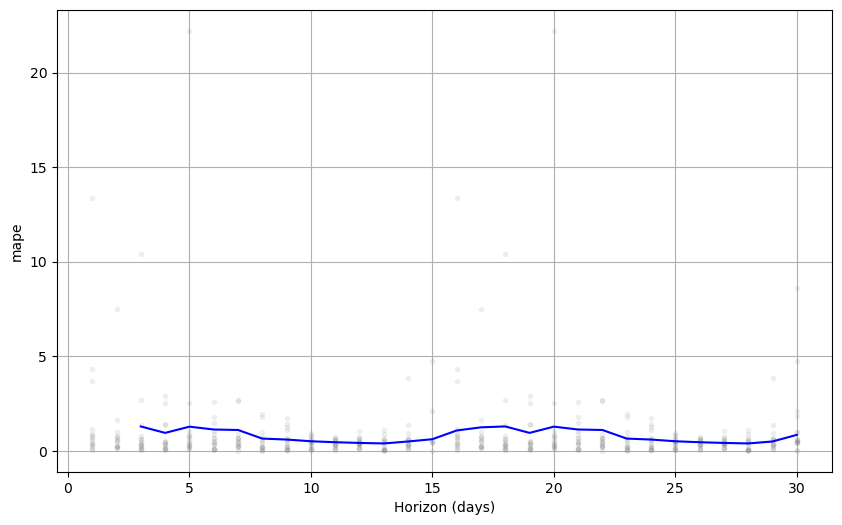

In [98]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='mape')
plt.show()

## LSTM Time series forecasting

In [23]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
Time_Stamp,,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


In [24]:
new_df = df[['priceMod']]

In [25]:
new_df.head()

,priceMod
Time_Stamp,
1996-01-01,226
1996-02-01,186
1996-03-01,243
1996-04-01,254
1996-05-01,269


In [26]:
new_df.tail()

,priceMod
Time_Stamp,
2015-10-01,3248
2015-11-01,2134
2015-12-01,1280
2016-01-01,1108
2016-02-01,802


In [27]:
start_date = new_df.index.min()
end_date = new_df.index.max()
print("Start Date  :", start_date)
print("End Date  :", end_date)

Start Date  : 1996-01-01 00:00:00
End Date  : 2016-02-01 00:00:00


<Axes: xlabel='Time_Stamp'>

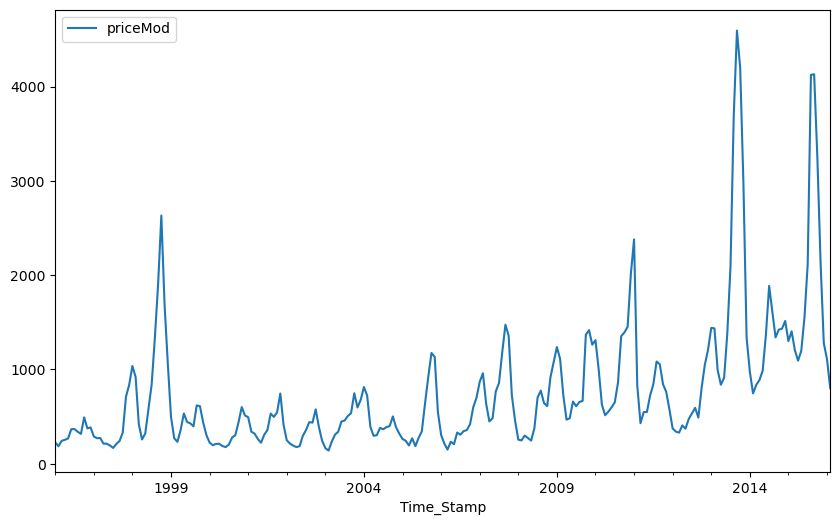

In [28]:
new_df.plot(figsize=(10,6))

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

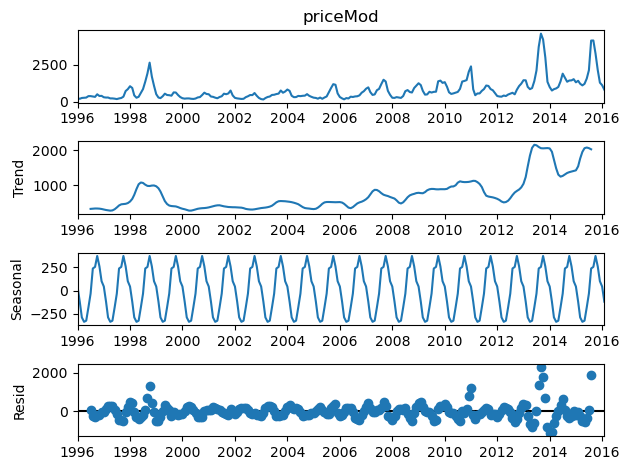

In [30]:
results = seasonal_decompose(new_df['priceMod'])
results.plot()
plt.show()

In [31]:
len(new_df)

242

In [32]:
train = new_df.iloc[:200]
test = new_df.iloc[200:]

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [35]:
scaled_train[:10]

array([[0.03451043],
       [0.01845907],
       [0.04133226],
       [0.04574639],
       [0.05176565],
       [0.09109149],
       [0.09149278],
       [0.08025682],
       [0.07102729],
       [0.14125201]])

In [36]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [37]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [38]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03451043 0.01845907 0.04133226]
Predict this y: 
 [[0.04574639]]


In [39]:
X.shape

(1, 3, 1)

In [40]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [42]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0301
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0168
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0258
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0139
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0153
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0093
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0132
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0060
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0098
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0107
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0061
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0100
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0061
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0084
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

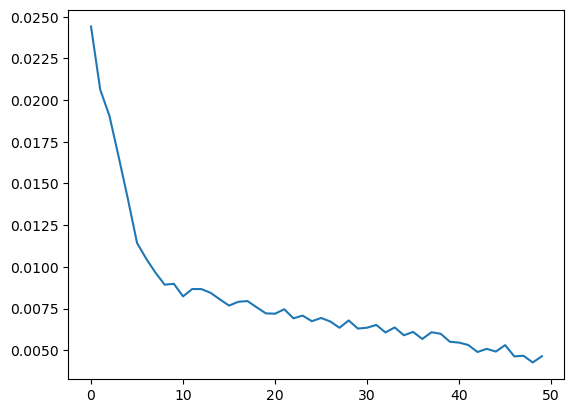

In [45]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [46]:
last_train_batch = scaled_train[-12:]

In [47]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [48]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


array([[0.1905233]], dtype=float32)

In [49]:
scaled_test[0]

array([0.14044944])

In [50]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [51]:
test_predictions

[array([0.1905233], dtype=float32),
 array([0.22157183], dtype=float32),
 array([0.25363237], dtype=float32),
 array([0.2614431], dtype=float32),
 array([0.2430164], dtype=float32),
 array([0.21292381], dtype=float32),
 array([0.18496667], dtype=float32),
 array([0.16312097], dtype=float32),
 array([0.16487546], dtype=float32),
 array([0.16683899], dtype=float32),
 array([0.17281978], dtype=float32),
 array([0.18318845], dtype=float32),
 array([0.20129369], dtype=float32),
 array([0.22917159], dtype=float32),
 array([0.2658784], dtype=float32),
 array([0.30438206], dtype=float32),
 array([0.3294769], dtype=float32),
 array([0.3188545], dtype=float32),
 array([0.264866], dtype=float32),
 array([0.19220306], dtype=float32),
 array([0.14264654], dtype=float32),
 array([0.12960029], dtype=float32),
 array([0.13443802], dtype=float32),
 array([0.14092346], dtype=float32),
 array([0.15531136], dtype=float32),
 array([0.18171448], dtype=float32),
 array([0.21340993], dtype=float32),
 array([0

In [52]:
test.head()

,priceMod
Time_Stamp,
2012-09-01,490
2012-10-01,802
2012-11-01,1049
2012-12-01,1207
2013-01-01,1441


In [53]:
true_predictions = scaler.inverse_transform(test_predictions)

In [54]:
test['Predictions'] = true_predictions

<Axes: xlabel='Time_Stamp'>

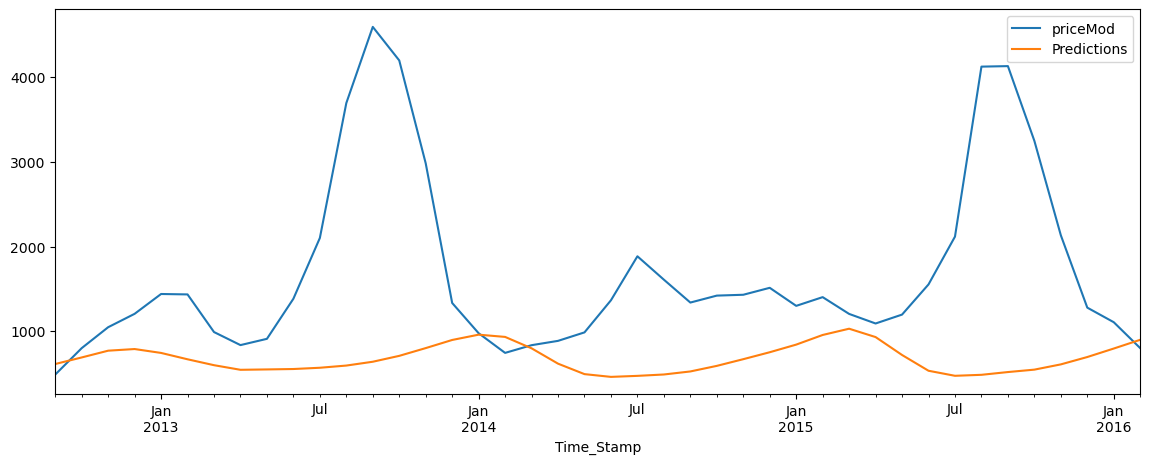

In [55]:
test.plot(figsize=(14,5))

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['priceMod'],test['Predictions']))
print(rmse)

1501.6391636408441


In [57]:
# calculate MAPE
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual))*100

In [58]:
mape4 = calculate_mape(test.priceMod, test.Predictions)
print("MAPE :", mape4)

MAPE : 48.714805888543154


In [105]:
resultDF1 = pd.DataFrame({'Test MAPE' : mape1}, index=['ARIMA(1, 0, 1)'])

resultDf2 = pd.DataFrame({'Test MAPE':mape2}, index=['SARIMA(1, 0, 1)(1, 1, 1, 12)'])
resultDf3 = pd.DataFrame({'Test MAPE':mape3}, index=['SARIMAX(0, 0, 1)(0, 1, 1, 12)'])
resultDf4 = pd.DataFrame({'Test MAPE':mape4}, index=['LSTM'])
resultDf_final = pd.concat([resultDF1, resultDf2,resultDf3,resultDf4])
resultDf_final

,Test MAPE
"ARIMA(1, 0, 1)",54.515936
"SARIMA(1, 0, 1)(1, 1, 1, 12)",53.120182
"SARIMAX(0, 0, 1)(0, 1, 1, 12)",6.599428
LSTM,48.714806


                                             *****************